### Indian Institute of Information Technology Raichur

**Name:** K. V. Jaya Harsha  
**Roll No:** CS23B1034  
**Course:** Deep Learning for Medical Imaging  

---

#### Assignment 4: Cell Nuclei Separation — Watershed Segmentation  
##### Marker-Controlled Watershed for Separation of Touching Cell Nuclei  

**Task:** Separate touching and overlapping cell nuclei from microscopy images  

**Methods:** Watershed segmentation without markers vs Marker-controlled watershed segmentation  

**Dataset:** Kaggle — Data Science Bowl 2018 Cell Nuclei Dataset  

**Compare:** Segmentation accuracy and over-segmentation behavior with and without marker control  

**Learning:** Understanding watershed segmentation and the importance of markers in controlling over-segmentation for accurate nuclei separation  


Install Dependecies

In [1]:
!pip install -q kagglehub opencv-python matplotlib scikit-image tqdm

In [2]:
import os
import kagglehub
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.io import imread

Upload kaggle.json for auth purposes

In [4]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"callmekvj","key":"c50a08192310b155778ee0857dc70c54"}'}

Move it to root folder

In [5]:
import os

# Create kaggle folder
os.makedirs("/root/.kaggle", exist_ok=True)

# Move file
!mv kaggle.json /root/.kaggle/

# Set permissions
!chmod 600 /root/.kaggle/kaggle.json


In [6]:
!pip install -q kagglehub

Download Dataset

In [8]:
# Download competition dataset
path = kagglehub.competition_download("data-science-bowl-2018")

print("Dataset downloaded to:")
print(path)


100%|██████████| 358M/358M [00:07<00:00, 50.1MB/s]

Extracting files...


Dataset downloaded to:
/root/.cache/kagglehub/competitions/data-science-bowl-2018


Explore Directory

In [10]:
import os

path = "/root/.cache/kagglehub/competitions/data-science-bowl-2018"

# List top-level files
print("Top-level contents:")
print(os.listdir(path))

print("\nFull directory structure:\n")

# Walk through directory
for root, dirs, files in os.walk(path):
    level = root.replace(path, "").count(os.sep)
    indent = " " * 4 * level
    print(f"{indent}{os.path.basename(root)}/")

    subindent = " " * 4 * (level + 1)
    for file in files[:3]:  # show only first 3 files per folder
        print(f"{subindent}{file}")


Top-level contents:
['stage1_sample_submission.csv.zip', 'stage1_train_labels.csv.zip', 'stage1_train.zip', 'stage1_test.zip', 'stage2_test_final.zip', 'stage2_sample_submission_final.csv.zip', 'stage1_solution.csv.zip']

Full directory structure:

data-science-bowl-2018/
    stage1_sample_submission.csv.zip
    stage1_train_labels.csv.zip
    stage1_train.zip


Unzip Files

In [11]:
import os
import zipfile

path = "/root/.cache/kagglehub/competitions/data-science-bowl-2018"

# Extract all zip files
for file in os.listdir(path):
    if file.endswith(".zip"):
        zip_path = os.path.join(path, file)
        extract_path = os.path.join(path, file.replace(".zip", ""))

        print(f"Extracting {file}...")

        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)

print("\nExtraction complete.")


Extracting stage1_sample_submission.csv.zip...
Extracting stage1_train_labels.csv.zip...
Extracting stage1_train.zip...
Extracting stage1_test.zip...
Extracting stage2_test_final.zip...
Extracting stage2_sample_submission_final.csv.zip...
Extracting stage1_solution.csv.zip...

Extraction complete.


In [12]:
print(os.listdir(path))

['stage1_test', 'stage1_sample_submission.csv.zip', 'stage1_train', 'stage1_train_labels.csv.zip', 'stage1_solution.csv', 'stage2_sample_submission_final.csv', 'stage1_sample_submission.csv', 'stage1_train.zip', 'stage2_test_final', 'stage1_test.zip', 'stage2_test_final.zip', 'stage1_train_labels.csv', 'stage2_sample_submission_final.csv.zip', 'stage1_solution.csv.zip']


Load and show one nuclei image with combined mask

Total samples: 670
Using sample: ee927e8255096971ddae1bd975cf80c4ad7c847c82d0b5f5dd2ddfe5407007ee


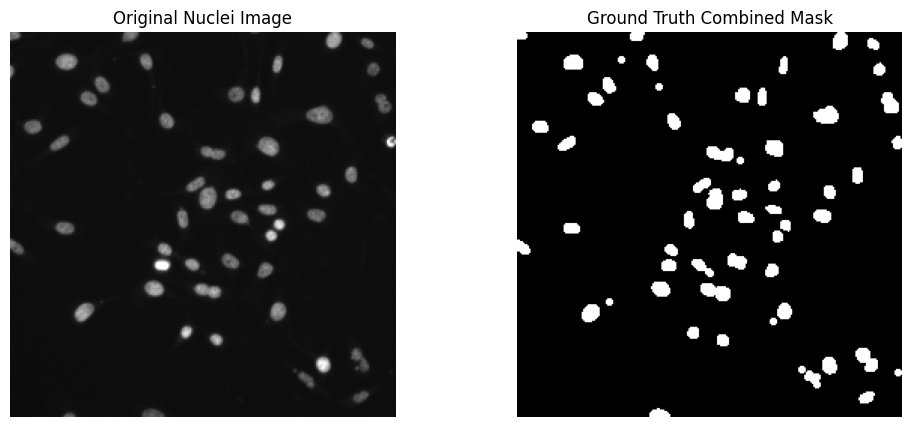

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

# Dataset path
base_path = "/root/.cache/kagglehub/competitions/data-science-bowl-2018"
train_path = os.path.join(base_path, "stage1_train")

# Get all sample IDs
sample_ids = os.listdir(train_path)

print("Total samples:", len(sample_ids))

# Select first sample
sample_id = sample_ids[0]
print("Using sample:", sample_id)

# Image path
image_path = os.path.join(train_path, sample_id, "images", sample_id + ".png")

# Mask folder
mask_dir = os.path.join(train_path, sample_id, "masks")

# Load image
image = imread(image_path)

# Combine all masks into one
combined_mask = np.zeros(image.shape[:2], dtype=np.uint8)

mask_files = os.listdir(mask_dir)

for mask_file in mask_files:
    mask = imread(os.path.join(mask_dir, mask_file))
    combined_mask = np.maximum(combined_mask, mask)

# Show image and mask
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(image)
plt.title("Original Nuclei Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(combined_mask, cmap="gray")
plt.title("Ground Truth Combined Mask")
plt.axis("off")

plt.show()


Preprocessing and Distance Transform

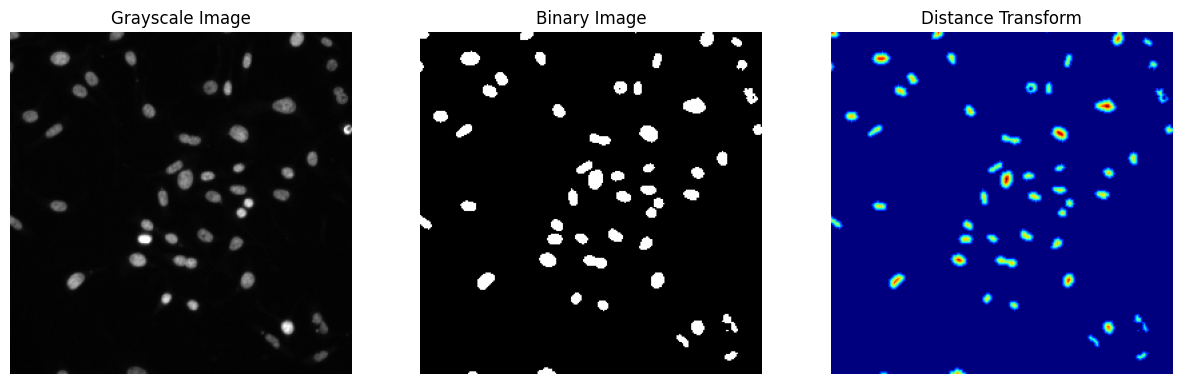

In [14]:
import cv2
from scipy import ndimage as ndi
from skimage.filters import threshold_otsu

# Convert image to grayscale if needed
if len(image.shape) == 3:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
else:
    gray = image.copy()

# Apply Otsu threshold
thresh_val = threshold_otsu(gray)
binary = gray > thresh_val

# Convert to uint8
binary_uint8 = (binary * 255).astype(np.uint8)

# Distance transform
distance = ndi.distance_transform_edt(binary)

# Show results
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(binary, cmap='gray')
plt.title("Binary Image")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(distance, cmap='jet')
plt.title("Distance Transform")
plt.axis("off")

plt.show()


Create markers and apply watershed

Number of nuclei detected: 97


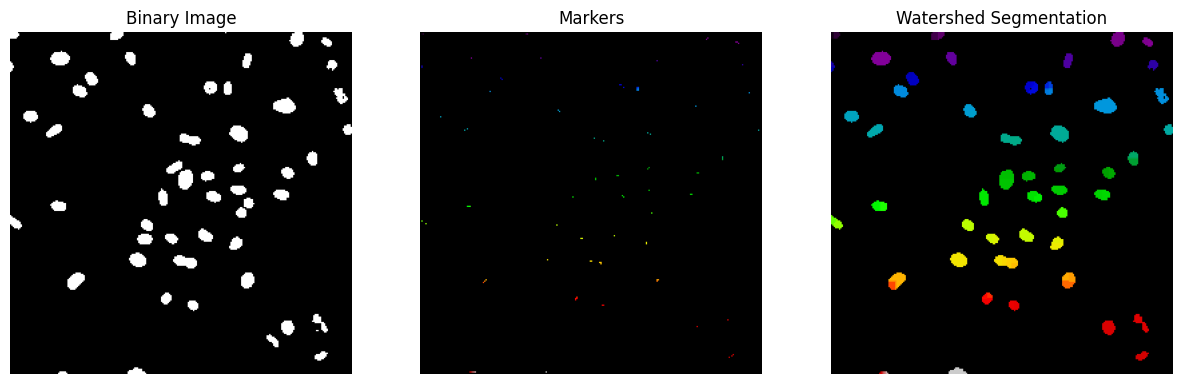

In [15]:
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from skimage.measure import label

# Find local maxima (markers)
local_max_coords = peak_local_max(
    distance,
    footprint=np.ones((25, 25)),
    labels=binary
)

# Create marker image
markers = np.zeros(distance.shape, dtype=int)

for i, coord in enumerate(local_max_coords):
    markers[coord[0], coord[1]] = i + 1

# Label markers
markers = label(markers)

# Apply watershed
labels_ws = watershed(-distance, markers, mask=binary)

print("Number of nuclei detected:", labels_ws.max())

# Show results
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(binary, cmap='gray')
plt.title("Binary Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(markers, cmap='nipy_spectral')
plt.title("Markers")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(labels_ws, cmap='nipy_spectral')
plt.title("Watershed Segmentation")
plt.axis("off")

plt.show()


Watershed WITHOUT markers vs WITH markers comparison

Segments WITHOUT markers: 9588
Segments WITH markers: 97


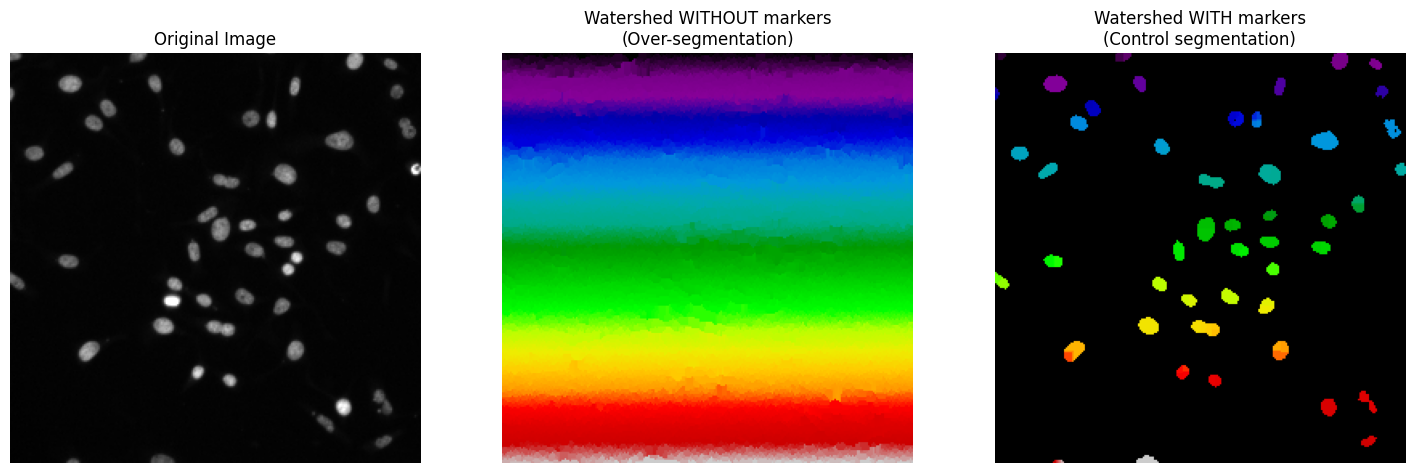

In [16]:
from skimage.segmentation import watershed
from skimage.filters import sobel

# Compute gradient image
gradient = sobel(gray)

# Watershed WITHOUT proper markers (causes over-segmentation)
labels_no_markers = watershed(gradient)

# Watershed WITH markers (already computed earlier)
labels_with_markers = labels_ws

print("Segments WITHOUT markers:", labels_no_markers.max())
print("Segments WITH markers:", labels_with_markers.max())

# Show comparison
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.imshow(gray, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(labels_no_markers, cmap='nipy_spectral')
plt.title("Watershed WITHOUT markers\n(Over-segmentation)")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(labels_with_markers, cmap='nipy_spectral')
plt.title("Watershed WITH markers\n(Control segmentation)")
plt.axis("off")

plt.show()


Overlay watershed boundaries on original image

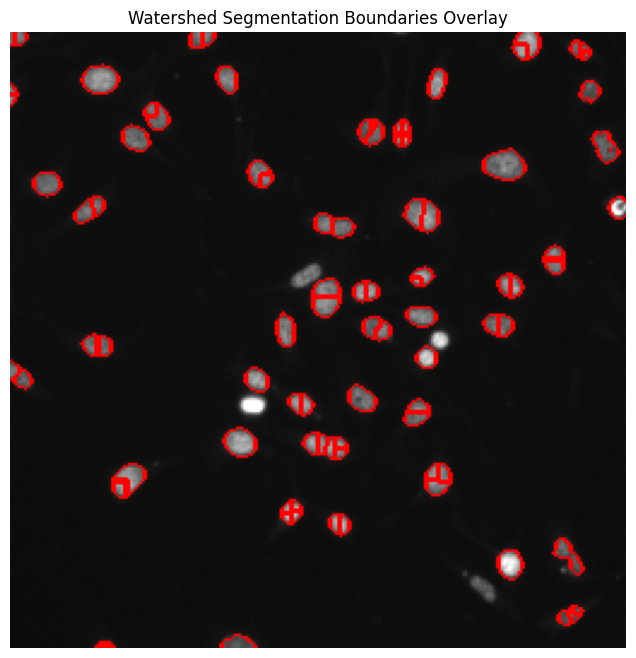

In [17]:
from skimage.segmentation import find_boundaries

# Find boundaries from watershed result
boundaries = find_boundaries(labels_with_markers, mode='outer')

# Convert original image to RGB if grayscale
if len(gray.shape) == 2:
    overlay = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
else:
    overlay = image.copy()

# Draw red boundaries
overlay[boundaries] = [255, 0, 0]

# Show overlay
plt.figure(figsize=(8,8))
plt.imshow(overlay)
plt.title("Watershed Segmentation Boundaries Overlay")
plt.axis("off")
plt.show()


### Conclusion

In this assignment, watershed segmentation was applied to separate touching cell nuclei from microscopy images. The watershed algorithm treats the image as a topographic surface and separates regions based on intensity gradients.

When watershed was applied without markers, it resulted in severe over-segmentation because every local intensity variation was treated as a separate region. This led to incorrect and excessive segmentation.

Marker-controlled watershed significantly improved the segmentation performance by using predefined markers obtained from the distance transform and local maxima detection. These markers guided the watershed algorithm to correctly identify individual nuclei and prevented unnecessary splitting.

The results demonstrate that marker-controlled watershed is an effective and reliable method for separating touching nuclei. It reduces over-segmentation and produces accurate boundaries, making it suitable for medical image segmentation tasks such as cell nuclei analysis.
